# 0. Import Dependecies

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Import Data

In [65]:
df = pd.read_csv("yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


# 2. Data Visualization

In [68]:
df['length'] = df['text'].apply(lambda x: len(x))

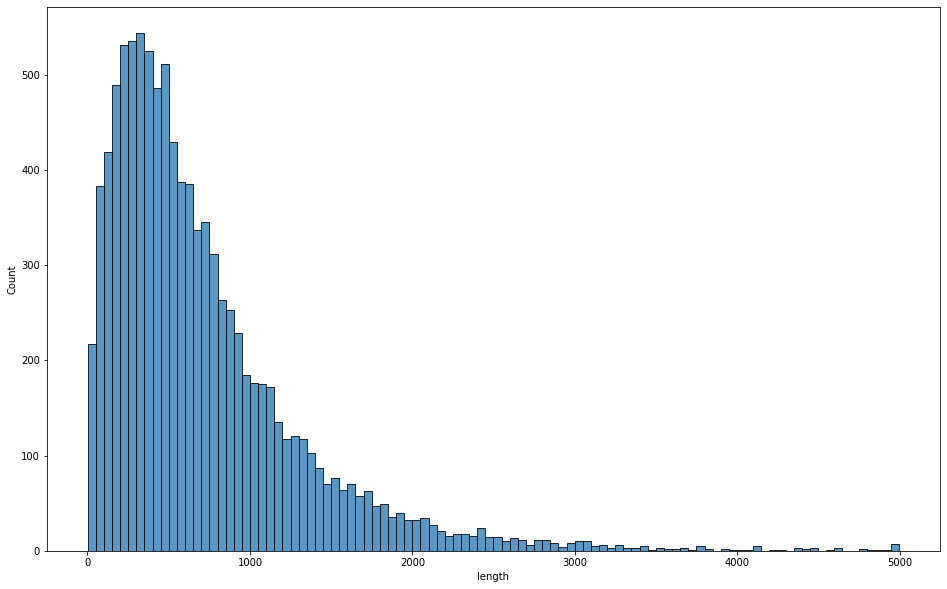

In [69]:
plt.figure(figsize=(16,10))
sns.histplot(data = df, x = 'length', bins=100)
plt.show()

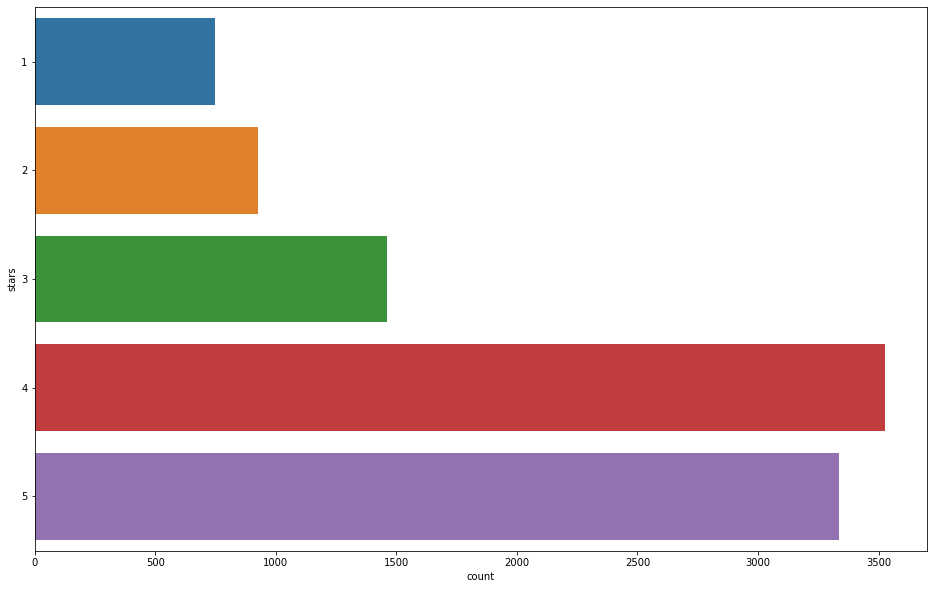

In [70]:
plt.figure(figsize=(16,10))
sns.countplot(data = df, y = 'stars')
plt.show()

<Figure size 1152x720 with 0 Axes>

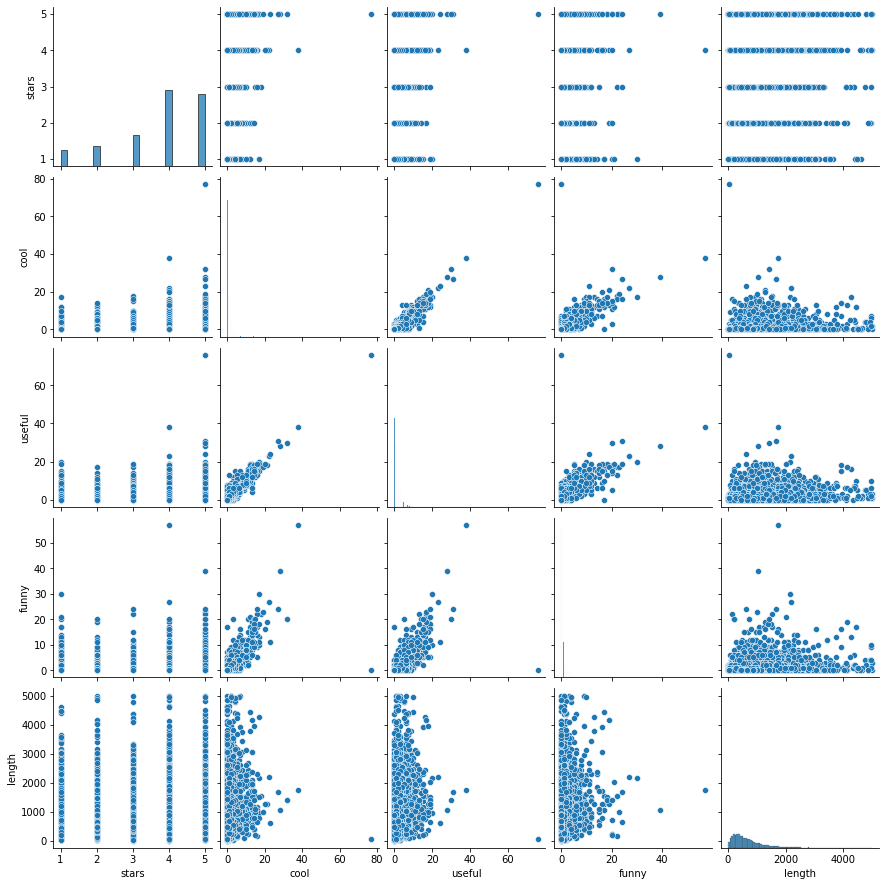

In [71]:
plt.figure(figsize=(16,10))
sns.pairplot(data = df)
plt.show()

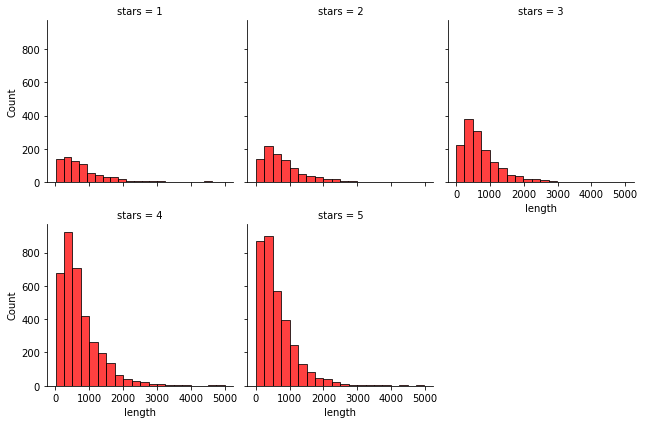

In [72]:
g = sns.FacetGrid(data=df, col="stars", col_wrap=3)
g.map(sns.histplot, 'length', bins = 20, color = "r")
plt.show()

In [73]:
df_1 = df[df['stars'] == 1]
df_5 = df[df['stars'] == 5]

df_1_5 = pd.concat([df_1, df_5])

df_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


In [74]:
print("1 Stars Percentage", len(df_1)/len(df_1_5))
print("5 Stars Percentage", len(df_5)/len(df_1_5))

1 Stars Percentage 0.18330885952031326
5 Stars Percentage 0.8166911404796867


# 3. Data Cleaning

## 3.1 Remove Punctuation

In [75]:
def remove_punc(text):
    removed_char_list = [char for char in text if char not in string.punctuation]
    removed = ''.join(removed_char_list)
    return removed

In [76]:
df_1_5['remove_punc_text'] = df_1_5['text'].apply(lambda x: remove_punc(x))

## 3.2 Remove Stopwords

In [77]:
def remove_stopwords(text):
    removed_char_list = [word for word in text.split(' ') if word.lower() not in stopwords.words('english')]
    removed = ' '.join(removed_char_list)
    return removed

In [78]:
df_1_5['remove_stopword_text'] = df_1_5['remove_punc_text'].apply(lambda x: remove_stopwords(x))

## 3.3 Count Vectorizer

In [79]:
vectorizer = CountVectorizer()# or vectorizer = CountVectorizer(analyzer = remove_punc)

X_countvectorizer = vectorizer.fit_transform(df_1_5['remove_stopword_text'])

In [80]:
X_countvectorizer.shape

(4086, 21993)

# 4. Train Model

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_countvectorizer, df_1_5['stars'].values, test_size=0.25)

In [82]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [83]:
def predict_review(sample):
    sample = remove_punc(sample)
    sample = remove_stopwords(sample)
    sample = vectorizer.transform([sample])
    y_pred = model.predict(sample)
    return y_pred.item()

In [84]:
test_sample1 = ["amazing food! highly recommended"]
test_sample2 = ["shit food, made me sick"]

In [85]:
print("Sample 1 :", predict_review(test_sample1))
print("Sample 2 :", predict_review(test_sample2))

Sample 1 : 5
Sample 2 : 1


# 5. Model Evaluate

In [86]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

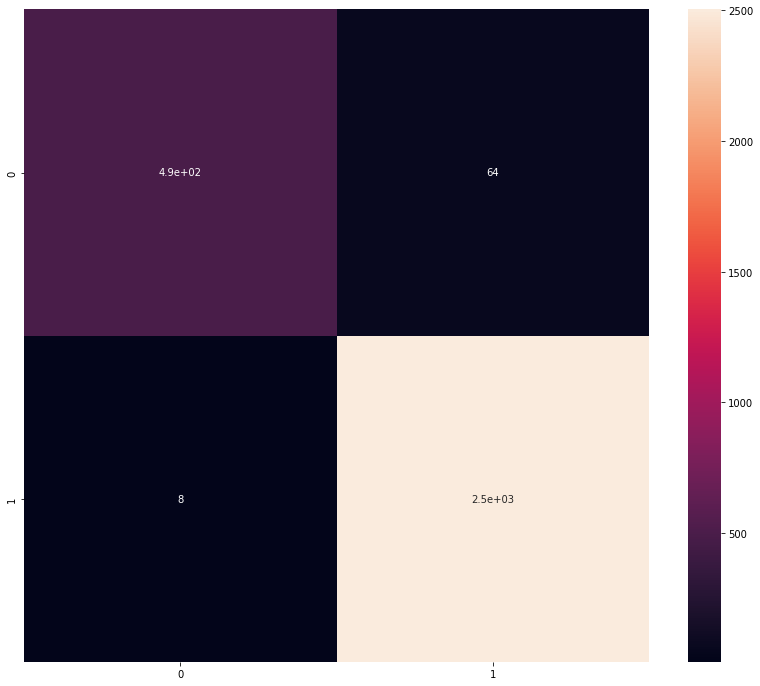

In [87]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot = True)
plt.show()

In [88]:
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

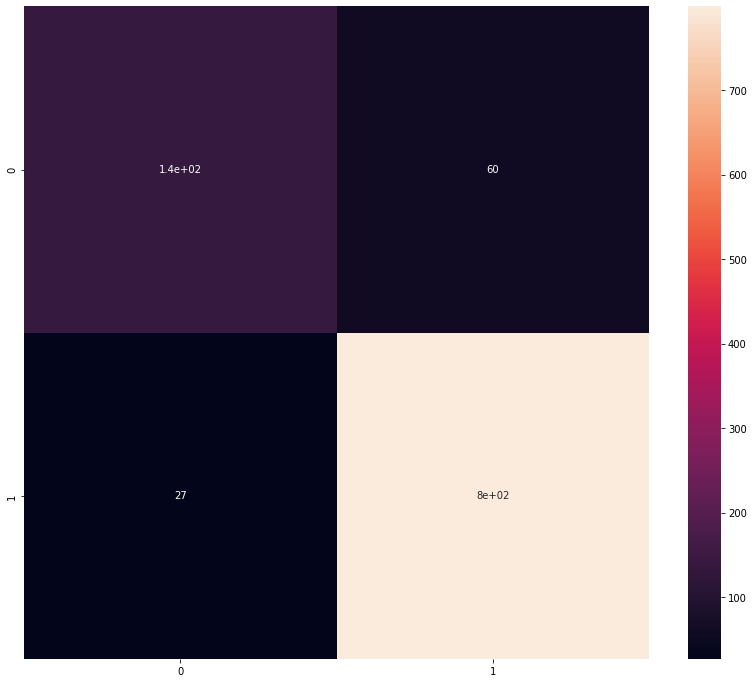

In [89]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot = True)
plt.show()

In [90]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.98      0.88      0.93       553
           5       0.98      1.00      0.99      2511

    accuracy                           0.98      3064
   macro avg       0.98      0.94      0.96      3064
weighted avg       0.98      0.98      0.98      3064



In [91]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.83      0.69      0.76       196
           5       0.93      0.97      0.95       826

    accuracy                           0.91      1022
   macro avg       0.88      0.83      0.85      1022
weighted avg       0.91      0.91      0.91      1022



# BONUS TF-IDF

In [96]:
vectorizer = TfidfTransformer()

X_tfidf = vectorizer.fit_transform(X_countvectorizer)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_1_5['stars'].values, test_size=0.25)

In [98]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [99]:
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

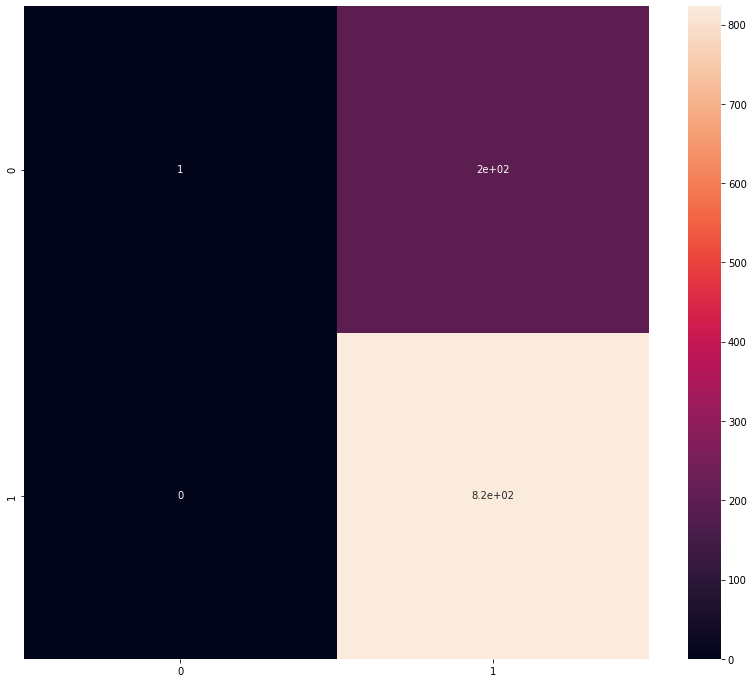

In [100]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot = True)
plt.show()

In [101]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       199
           5       0.81      1.00      0.89       823

    accuracy                           0.81      1022
   macro avg       0.90      0.50      0.45      1022
weighted avg       0.84      0.81      0.72      1022

